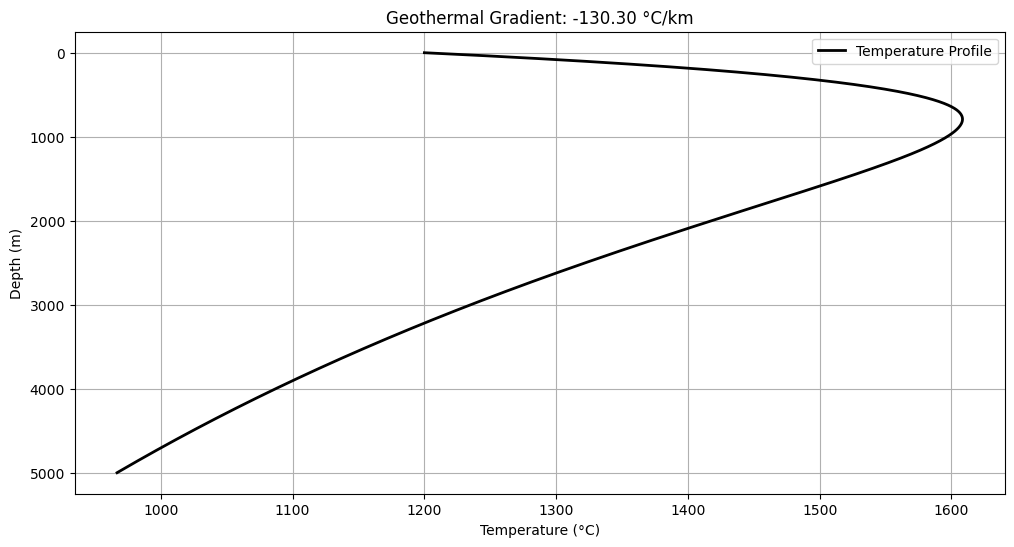

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import exp, pi, log

# Constants and initial conditions
siy = 3600.0 * 24.0 * 365.25  # seconds in year
siby = siy * 1.0e9  # seconds in billion years
d = 1.1  # lithosphere thinning factor
Ltoday = 35.0 * 1000.0  # in meters, thickness of the lithosphere
today = 4.6 * siby  # present day in seconds
T0 = 1200.0  # initial temperature (degrees Celsius)

# Define the function for solving the differential equation
def myfun(t, u):
    # Physical constants
    R = 6300.0 * 1000.0  # in meters, radius of the earth's mantle
    V = (4.0 / 3.0) * pi * (R ** 3)  # in m^3, volume of the mantle
    A = 4.0 * pi * (R ** 2)  # in m^2, surface area of the mantle
    cp = 1260.0  # J/kg-K, heat capacity
    rho = 5000.0  # kg/m^3, density of mantle rock
    C = rho * cp * V  # in J/K, total heat capacity

    # Heat production from radioactivity
    hTtoday = 3.27e-12  # in J/s-kg
    h1today = 2.91e-12  # in J/s-kg
    hKtoday = 1.08e-12  # in J/s-kg
    h2today = 0.125e-12  # in J/s-kg
    HLT = 14.2 * siby  # half-life of thorium
    HL1 = 4.47 * siby  # half-life of uranium
    HLK = 1.25 * siby  # half-life of potassium
    HL2 = 0.704 * siby  # half-life of uranium-235
    rT = log(2.0) / HLT
    r1 = log(2.0) / HL1
    rK = log(2.0) / HLK
    r2 = log(2.0) / HL2
    hT = hTtoday * exp(-rT * (t - today))
    h1 = h1today * exp(-r1 * (t - today))
    hK = hKtoday * exp(-rK * (t - today))
    h2 = h2today * exp(-r2 * (t - today))
    h = hT + h1 + hK + h2
    H = V * h * rho  # in J/s, total heat production at time t

    # Heat loss through the lithosphere
    k = 3.0  # in J/s-m-K, thermal conductivity of rock
    Ttoday = 1350.0  # present day mantle temperature (degrees Celsius)
    G = d * Ltoday / Ttoday
    L = Ltoday - G * (u[0] - Ttoday)  # lithospheric thickness
    K = k * A / L  # in J/s-K, total heat loss
    f = np.zeros((1,))
    f[0] = (H / C) - (K / C) * u[0]  # differential equation
    return f

# Time axis for simulation
Dt = siby * 0.005
t0 = 0.0
tmax = siby * 10.0
t = np.arange(t0, t0 + tmax, Dt)

# Solve differential equation
sol = solve_ivp(myfun, [t0, tmax], [T0], method='RK45', t_eval=t)

# Compute geothermal gradient (temperature gradient) from the temperature profile
depths = np.linspace(0, 5000, len(sol.t))  # Depths from 0 to 5000 meters
temperatures = sol.y[0]  # Temperature profile

# Linear fit to estimate geothermal gradient
slope, intercept = np.polyfit(depths, temperatures, 1)
gradient = slope * 1000  # Convert °C/m to °C/km

# Plot temperature as a function of depth
plt.figure(figsize=(12, 6))
plt.plot(temperatures, depths, 'k-', lw=2, label='Temperature Profile')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title(f'Geothermal Gradient: {gradient:.2f} °C/km')
plt.gca().invert_yaxis()  # Depth increases downwards
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Define temperatures and depth
T_surface = 1000  # Temperature at surface in °C
T_deep = 1600     # Temperature at 5000m depth in °C
depth_max = 5000  # Maximum depth in meters

# Calculate the geothermal gradient
gradient_C_per_m = (T_deep - T_surface) / depth_max
gradient_C_per_km = gradient_C_per_m * 1000  # Convert to °C/km

print(f"Geothermal Gradient: {gradient_C_per_km:.2f} °C/km")

Geothermal Gradient: 120.00 °C/km


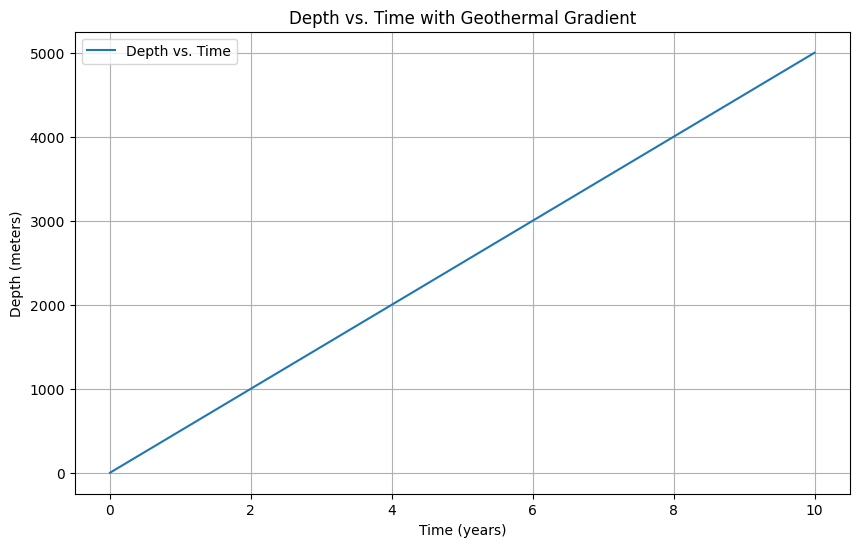

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gradient_C_per_km = 120  # Geothermal gradient in °C/km
depth_max = 5000  # Maximum depth in meters
time_max = 10  # Time period in years

# Define time and temperature arrays
time_years = np.linspace(0, time_max, 1000)  # Time from 0 to time_max years
temperature_surface_initial = 1000  # Initial temperature at surface in °C
temperature_surface_final = 1600  # Final temperature at surface in °C

# Linear temperature change over time
temperature_surface = np.linspace(temperature_surface_initial, temperature_surface_final, len(time_years))

# Calculate depth from temperature and gradient
depth_m = (temperature_surface - temperature_surface_initial) / gradient_C_per_km * 1000  # Convert gradient to °C/m

# Ensure depth does not exceed max depth
depth_m = np.clip(depth_m, 0, depth_max)

# Plot depth vs. time
plt.figure(figsize=(10, 6))
plt.plot(time_years, depth_m, label='Depth vs. Time')
plt.xlabel('Time (years)')
plt.ylabel('Depth (meters)')
plt.title('Depth vs. Time with Geothermal Gradient')
plt.legend()
plt.grid(True)
plt.show()

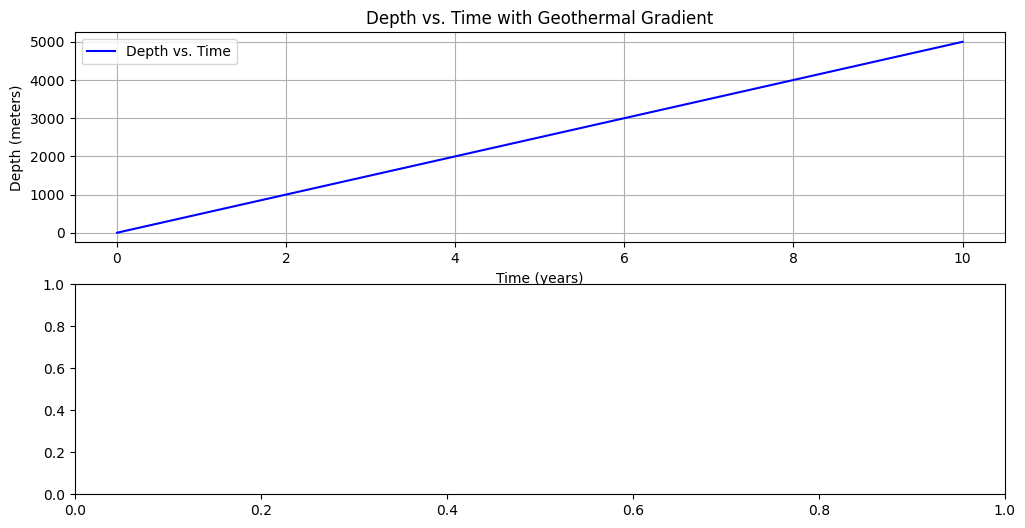

<class 'ValueError'>: x and y must have same first dimension, but have shapes (1000,) and (1,)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gradient_C_per_km = 120  # Geothermal gradient in °C/km
depth_max = 5000  # Maximum depth in meters
time_max = 10  # Time period in years
thermal_conductivity = 3.0  # Thermal conductivity in W/(m·K)
heat_flux = 40.0  # Heat flux in mW/m² (milliwatts per square meter)

# Convert heat flux to W/m² for calculations
heat_flux_W_per_m2 = heat_flux * 1e-3

# Define time and temperature arrays
time_years = np.linspace(0, time_max, 1000)  # Time from 0 to time_max years
temperature_surface_initial = 1000  # Initial temperature at surface in °C
temperature_surface_final = 1600  # Final temperature at surface in °C

# Linear temperature change over time
temperature_surface = np.linspace(temperature_surface_initial, temperature_surface_final, len(time_years))

# Calculate depth from temperature and gradient
depth_m = (temperature_surface - temperature_surface_initial) / gradient_C_per_km * 1000  # Convert gradient to °C/m

# Ensure depth does not exceed max depth
depth_m = np.clip(depth_m, 0, depth_max)

# Calculate the heat flux as a function of depth
def heat_flux_at_depth(depth_m, k, temperature_surface_initial, gradient_C_per_km):
    # Temperature at depth
    temperature_depth = temperature_surface_initial + (gradient_C_per_km / 1000.0) * depth_m  # Convert gradient to °C/m
    # Heat flux = thermal conductivity * temperature gradient
    heat_flux = k * (gradient_C_per_km / 1000.0)  # Convert gradient to °C/m
    return heat_flux

# Compute the heat flux for the given depths
flux_at_depth = heat_flux_at_depth(depth_m, thermal_conductivity, temperature_surface_initial, gradient_C_per_km)

# Plot depth vs. time with heat flux
plt.figure(figsize=(12, 6))

# Plot Depth vs. Time
plt.subplot(2, 1, 1)
plt.plot(time_years, depth_m, label='Depth vs. Time', color='blue')
plt.xlabel('Time (years)')
plt.ylabel('Depth (meters)')
plt.title('Depth vs. Time with Geothermal Gradient')
plt.legend()
plt.grid(True)

# Plot Heat Flux vs. Depth
plt.subplot(2, 1, 2)
plt.plot(depth_m, flux_at_depth, label='Heat Flux vs. Depth', color='red')
plt.xlabel('Depth (meters)')
plt.ylabel('Heat Flux (W/m²)')
plt.title('Heat Flux as a Function of Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

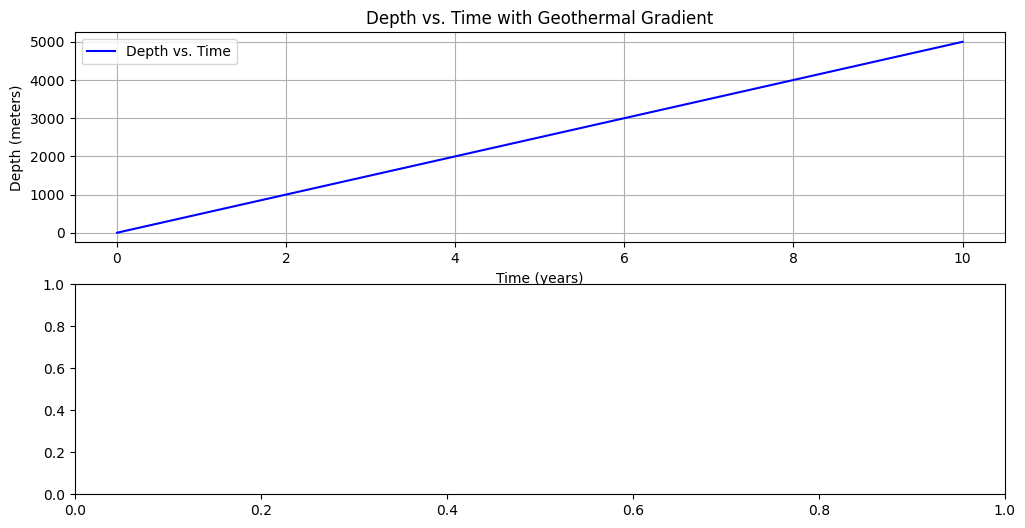

<class 'ValueError'>: x and y must have same first dimension, but have shapes (1000,) and (1,)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gradient_C_per_km = 120  # Geothermal gradient in °C/km
depth_max = 5000  # Maximum depth in meters
time_max = 10  # Time period in years
thermal_conductivity = 3.0  # Thermal conductivity in W/(m·K)
heat_flux = 40.0  # Heat flux in mW/m² (milliwatts per square meter)

# Convert heat flux to W/m² for calculations
heat_flux_W_per_m2 = heat_flux * 1e-3

# Define time and temperature arrays
time_years = np.linspace(0, time_max, 1000)  # Time from 0 to time_max years
temperature_surface_initial = 1000  # Initial temperature at surface in °C
temperature_surface_final = 1600  # Final temperature at surface in °C

# Linear temperature change over time
temperature_surface = np.linspace(temperature_surface_initial, temperature_surface_final, len(time_years))

# Calculate depth from temperature and gradient
depth_m = (temperature_surface - temperature_surface_initial) / gradient_C_per_km * 1000  # Convert gradient to °C/m

# Ensure depth does not exceed max depth
depth_m = np.clip(depth_m, 0, depth_max)

# Calculate the heat flux as a function of depth
def heat_flux_at_depth(depth_m, k, gradient_C_per_km):
    # Temperature at depth
    temperature_depth = temperature_surface_initial + (gradient_C_per_km / 1000.0) * depth_m  # Convert gradient to °C/m
    # Heat flux = thermal conductivity * temperature gradient
    heat_flux = k * (gradient_C_per_km / 1000.0)  # Convert gradient to °C/m
    return heat_flux

# Compute the heat flux for the given depths
flux_at_depth = heat_flux_at_depth(depth_m, thermal_conductivity, gradient_C_per_km)

# Plot depth vs. time with heat flux
plt.figure(figsize=(12, 6))

# Plot Depth vs. Time
plt.subplot(2, 1, 1)
plt.plot(time_years, depth_m, label='Depth vs. Time', color='blue')
plt.xlabel('Time (years)')
plt.ylabel('Depth (meters)')
plt.title('Depth vs. Time with Geothermal Gradient')
plt.legend()
plt.grid(True)

# Plot Heat Flux vs. Depth
plt.subplot(2, 1, 2)
plt.plot(depth_m, flux_at_depth, label='Heat Flux vs. Depth', color='red')
plt.xlabel('Depth (meters)')
plt.ylabel('Heat Flux (W/m²)')
plt.title('Heat Flux as a Function of Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

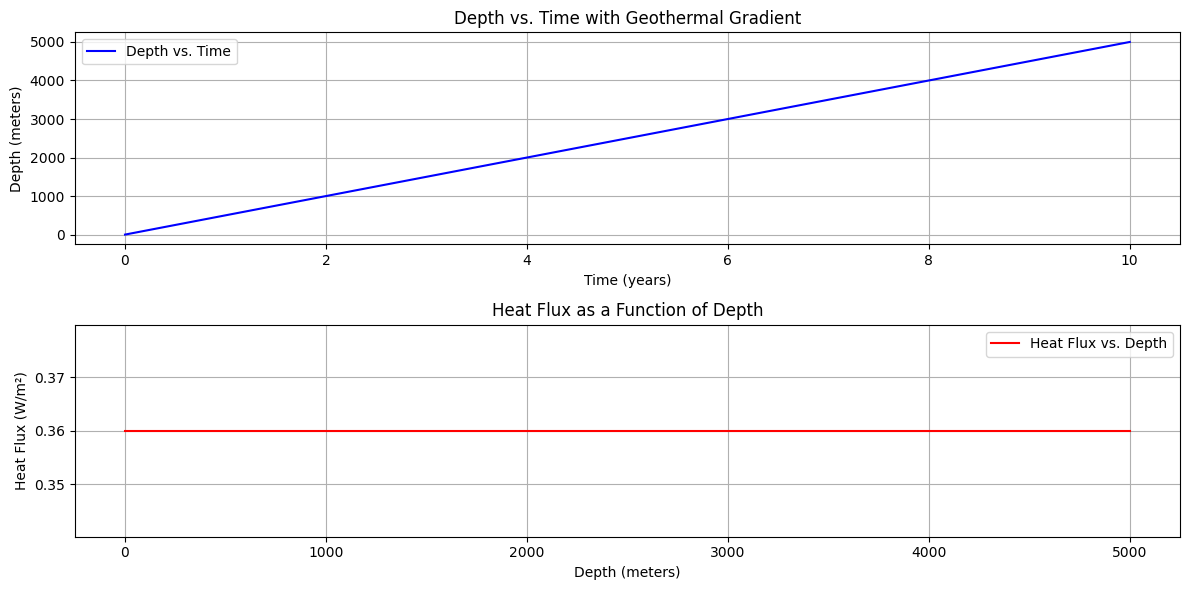

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gradient_C_per_km = 120  # Geothermal gradient in °C/km
depth_max = 5000  # Maximum depth in meters
time_max = 10  # Time period in years
thermal_conductivity = 3.0  # Thermal conductivity in W/(m·K)
heat_flux = 40.0  # Heat flux in mW/m² (milliwatts per square meter)

# Convert heat flux to W/m² for calculations
heat_flux_W_per_m2 = heat_flux * 1e-3

# Define time and temperature arrays
time_years = np.linspace(0, time_max, 1000)  # Time from 0 to time_max years
temperature_surface_initial = 1000  # Initial temperature at surface in °C
temperature_surface_final = 1600  # Final temperature at surface in °C

# Linear temperature change over time
temperature_surface = np.linspace(temperature_surface_initial, temperature_surface_final, len(time_years))

# Calculate depth from temperature and gradient
depth_m = (temperature_surface - temperature_surface_initial) / gradient_C_per_km * 1000  # Convert gradient to °C/m

# Ensure depth does not exceed max depth
depth_m = np.clip(depth_m, 0, depth_max)

# Calculate the heat flux as a function of depth
def heat_flux_at_depth(depth_m, k, gradient_C_per_km):
    # Heat flux = thermal conductivity * temperature gradient
    temperature_gradient = gradient_C_per_km / 1000.0  # Convert gradient to °C/m
    heat_flux = k * temperature_gradient  # in W/m²
    return np.full_like(depth_m, heat_flux)

# Compute the heat flux for the given depths
flux_at_depth = heat_flux_at_depth(depth_m, thermal_conductivity, gradient_C_per_km)

# Plot depth vs. time with heat flux
plt.figure(figsize=(12, 6))

# Plot Depth vs. Time
plt.subplot(2, 1, 1)
plt.plot(time_years, depth_m, label='Depth vs. Time', color='blue')
plt.xlabel('Time (years)')
plt.ylabel('Depth (meters)')
plt.title('Depth vs. Time with Geothermal Gradient')
plt.legend()
plt.grid(True)

# Plot Heat Flux vs. Depth
plt.subplot(2, 1, 2)
plt.plot(depth_m, flux_at_depth, label='Heat Flux vs. Depth', color='red')
plt.xlabel('Depth (meters)')
plt.ylabel('Heat Flux (W/m²)')
plt.title('Heat Flux as a Function of Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()